In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the Citipy module to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san quintin
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | sorvag
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | kaka
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | rumoi
Processing Record 14 of Set 1 | key west
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | gushikawa
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | kindia
Processing Record 41 of Set 4 | cuiluan
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | maragogi
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | mercedes
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | muscat
Processing Record 1 of Set 5 | barro
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | kosonsoy
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | spring valley
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | killybegs
Processing Record 9 of Set 5 | qaanaaq
Processing Record 10 of Set 5 | kribi
Processing Record 11 of Set 5 | canon city
Processing Record 12 of Set 5 | ge

Processing Record 29 of Set 8 | cabedelo
Processing Record 30 of Set 8 | susehri
Processing Record 31 of Set 8 | bambanglipuro
Processing Record 32 of Set 8 | lakes entrance
Processing Record 33 of Set 8 | uyuni
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | pribelskiy
City not found. Skipping...
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | jalu
Processing Record 38 of Set 8 | knysna
Processing Record 39 of Set 8 | nuevo imperial
Processing Record 40 of Set 8 | zolnoye
City not found. Skipping...
Processing Record 41 of Set 8 | bodden town
Processing Record 42 of Set 8 | maine-soroa
Processing Record 43 of Set 8 | baykit
Processing Record 44 of Set 8 | paidha
Processing Record 45 of Set 8 | santa luzia
Processing Record 46 of Set 8 | progreso
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | kaihua
Processing Record 49 of Set 8 | nizhnyaya tavda
Processing Record 50 of Set 8 | laguna de perlas
Processing R

Processing Record 17 of Set 12 | broken hill
Processing Record 18 of Set 12 | la ronge
Processing Record 19 of Set 12 | omaruru
Processing Record 20 of Set 12 | rehoboth
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | dalvik
Processing Record 23 of Set 12 | sri aman
Processing Record 24 of Set 12 | perelyub
Processing Record 25 of Set 12 | nouadhibou
Processing Record 26 of Set 12 | lucapa
Processing Record 27 of Set 12 | hirara
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | shaoyang
Processing Record 30 of Set 12 | taldan
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | osypenko
Processing Record 33 of Set 12 | along
Processing Record 34 of Set 12 | moussoro
Processing Record 35 of Set 12 | eskasem
City not found. Skipping...
Processing Record 36 of Set 12 | cotonou
Processing Record 37 of Set 12 | mendahara
City not found. Skipping...
Processing Record 38 of Set 12 | kuryk
Processing Record 39 of Set 12 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintin,30.4833,-115.9500,63.43,64,0,16.35,MX,2021-04-17 21:28:43
1,Kapaa,22.0752,-159.3190,73.40,68,75,11.50,US,2021-04-17 21:28:44
2,Ancud,-41.8697,-73.8203,64.40,68,75,5.84,CL,2021-04-17 21:28:44
3,Yellowknife,62.4560,-114.3525,36.00,60,75,6.91,CA,2021-04-17 21:28:45
4,Kaka,37.3482,59.6143,65.35,37,7,4.83,TM,2021-04-17 21:28:45
5,Rikitea,-23.1203,-134.9692,77.23,68,97,8.75,PF,2021-04-17 21:28:46
6,Puerto Ayora,-0.7393,-90.3518,81.00,94,90,4.61,EC,2021-04-17 21:26:24
7,Airai,-8.9266,125.4092,58.08,83,94,2.10,TL,2021-04-17 21:28:46
8,Kruisfontein,-34.0033,24.7314,61.43,40,32,2.86,ZA,2021-04-17 21:28:47
9,Atuona,-9.8000,-139.0333,80.31,76,46,18.92,PF,2021-04-17 21:28:47


In [10]:
# Reorder the columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Quintin,MX,2021-04-17 21:28:43,30.4833,-115.9500,63.43,64,0,16.35
1,Kapaa,US,2021-04-17 21:28:44,22.0752,-159.3190,73.40,68,75,11.50
2,Ancud,CL,2021-04-17 21:28:44,-41.8697,-73.8203,64.40,68,75,5.84
3,Yellowknife,CA,2021-04-17 21:28:45,62.4560,-114.3525,36.00,60,75,6.91
4,Kaka,TM,2021-04-17 21:28:45,37.3482,59.6143,65.35,37,7,4.83
5,Rikitea,PF,2021-04-17 21:28:46,-23.1203,-134.9692,77.23,68,97,8.75
6,Puerto Ayora,EC,2021-04-17 21:26:24,-0.7393,-90.3518,81.00,94,90,4.61
7,Airai,TL,2021-04-17 21:28:46,-8.9266,125.4092,58.08,83,94,2.10
8,Kruisfontein,ZA,2021-04-17 21:28:47,-34.0033,24.7314,61.43,40,32,2.86
9,Atuona,PF,2021-04-17 21:28:47,-9.8000,-139.0333,80.31,76,46,18.92


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

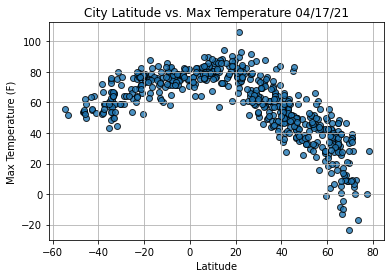

In [14]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1")

# Show plot
plt.show()

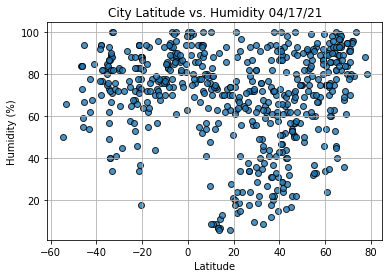

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

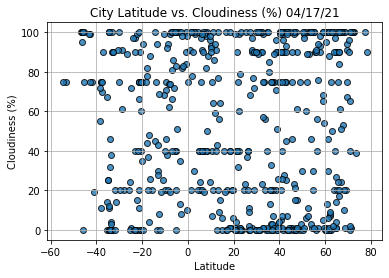

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

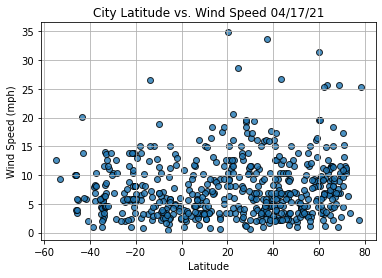

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()